# import library

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# 2. (a) generate data

In [2]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, Y = twospirals(1000)

# plt.title('training set')
# plt.plot(X[Y==0,0], X[Y==0,1], '.', label='class 1')
# plt.plot(X[Y==1,0], X[Y==1,1], '.', label='class 2')
# plt.legend()
# plt.show() 

# (a) only 25 labeled data

In [3]:
X1 = pd.DataFrame(X)
Y1 = pd.DataFrame(Y)
Y2 = Y1.rename({0:'label'},axis=1)

xy = pd.concat([X1,Y2],axis=1)
xy = xy.sample(frac=1, random_state=1004)

X,Y = xy.loc[:,[0,1]], xy.loc[:,'label']

X = X.to_numpy()
Y = Y.to_numpy()

labeled =25
n= 2000
alpha=0.99
sigma=0.2

label_Y = np.concatenate(((Y[:labeled,None]==np.arange(2)).astype(float),np.zeros((n-labeled,2))))

In [4]:
label_Y[:30]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# LGC algorithm

# (b) construct an affinity matrix 

In [5]:
def matrix_W():
    rbf_result = lambda x, sigma: math.exp((-x)/(2*(math.pow(sigma,2))))
    vectorize = np.vectorize(rbf_result)
    distance = cdist(X, X, 'euclidean')
    W = vectorize(distance, sigma)
    np.fill_diagonal(W, 0)
    return W
W = matrix_W()

def construct_S(W):
    d = np.sum(W, axis=1)
    D = np.sqrt(d*d[:, np.newaxis])
    return np.divide(W,D,where=D!=0)

S = construct_S(W)

# (b)	Propagate labels 

In [6]:
F = np.dot(S, label_Y)*alpha + (1-alpha)*label_Y
result_Y = np.zeros_like(F)
result_Y[np.arange(len(F)), F.argmax(1)] = 1

In [7]:
result_Y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# (c) visualize t = 1, 50, 100, 400 

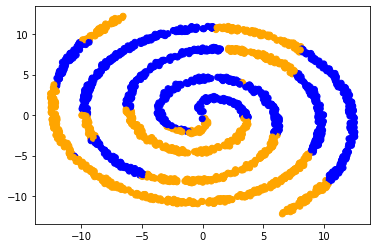

In [8]:
result_1 = [1 if x == 0 else 0 for x in result_Y[0:,0]]
color = ['orange' if l == 0 else 'blue' for l in result_1]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()

# t = 50

In [9]:
F2 = np.dot(S, label_Y)*alpha + (1-alpha)*label_Y
n_iteration = 50
for t in range(n_iteration):
    F2 = np.dot(S, F2)*alpha + (1-alpha)*label_Y

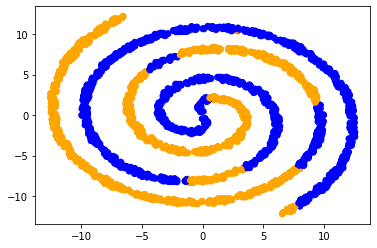

In [10]:
result_Y2 = np.zeros_like(F2)
result_Y2[np.arange(len(F2)), F2.argmax(1)] = 1

result_2 = [1 if x == 0 else 0 for x in result_Y2[0:,0]]

color = ['orange' if l == 0 else 'blue' for l in result_2]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()    
    

# t = 100

In [11]:
F3 = np.dot(S, label_Y)*alpha + (1-alpha)*label_Y
n_iteration = 100
for t in range(n_iteration):
    F3 = np.dot(S, F3)*alpha + (1-alpha)*label_Y

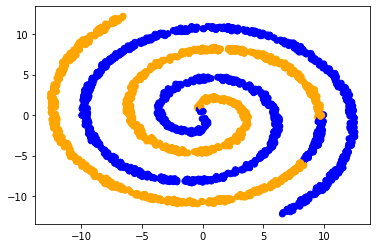

In [12]:
result_Y3 = np.zeros_like(F3)
result_Y3[np.arange(len(F3)), F3.argmax(1)] = 1

result_3 = [1 if x == 0 else 0 for x in result_Y3[0:,0]]

color = ['orange' if l == 0 else 'blue' for l in result_3]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()    

# t = 400 convergence

In [13]:
F4 = np.dot(S, label_Y)*alpha + (1-alpha)*label_Y
n_iteration = 400
for t in range(n_iteration):
    F4 = np.dot(S, F4)*alpha + (1-alpha)*label_Y

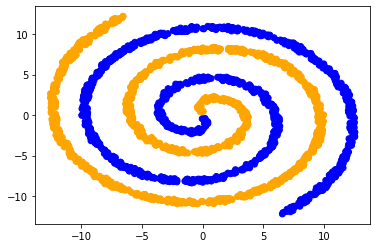

In [14]:
result_Y4 = np.zeros_like(F4)
result_Y4[np.arange(len(F4)), F4.argmax(1)] = 1

result_4 = [1 if x == 0 else 0 for x in result_Y4[0:,0]]

color = ['orange' if l == 0 else 'blue' for l in result_4]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()

# (d) Eq3 algorithm & compare to (b)

In [15]:
eq3 = np.linalg.inv(np.identity(2000)-alpha*S)
F5 = np.dot(eq3, label_Y)

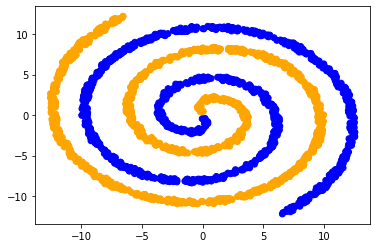

In [16]:
result_Y5 = np.zeros_like(F5)
result_Y5[np.arange(len(F5)), F5.argmax(1)] = 1

result_5 = [1 if x == 0 else 0 for x in result_Y5[0:,0]]

color = ['orange' if l == 0 else 'blue' for l in result_5]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()

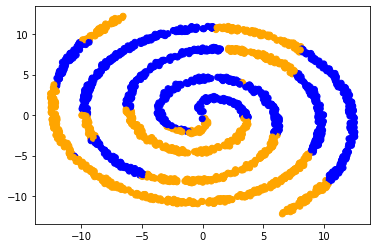

In [17]:
result_1 = [1 if x == 0 else 0 for x in result_Y[0:,0]]
color = ['orange' if l == 0 else 'blue' for l in result_1]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.show()